# Projet d'économétrie

## Partie 1. Régréssion

### Question 1

In [12]:
load MROZ.RAW

% Le salaire est nul après la 428ème observation
S=MROZ(1:428,:);

### Question 2

###### a) Pour l'ensemble des femmes

In [20]:
salary = S(:,7);
moyS = mean(salary);
ecarS = std(salary);
varS = var(salary);

X1 = ['Salaire:  moyenne = ', num2str(moyS), '  ecart-type = ', num2str(ecarS), '  variance = ', num2str(varS)];
disp(X1)

age = S(:,5);
moyA = mean(age);
ecarA = std(age);
varA = var(age);

X2 = ['Age:  moyenne = ', num2str(moyA), '  ecart-type = ', num2str(ecarA), '  variance = ', num2str(varA)];
disp(X2)

educ = S(:,6);
moyE = mean(educ);
ecarE = std(educ);
varE = var(educ);

X3 = ['Education:  moyenne = ', num2str(moyE), '  ecart-type = ', num2str(ecarE), '  variance = ', num2str(varE)];
disp(X3)

Salaire:  moyenne = 4.1777  ecart-type = 3.3103  variance = 10.958
Age:  moyenne = 41.972  ecart-type = 7.7211  variance = 59.6151
Education:  moyenne = 12.6589  ecart-type = 2.2854  variance = 5.2229


##### b) Femmes dont le salaire du mari est supérieur à la médiane de l'échantillon

In [32]:
%%Le salaire des mari est placé colonne 12
med = median(S(:,12));

S2 = S((S(:,12)>med),:);

salary2 = S2(:,7);
moyS2 = mean(salary2);
ecarS2 = std(salary2);
varS2 = var(salary2);

X4 = ['Salaire:  moyenne = ', num2str(moyS2), '  ecart-type = ', num2str(ecarS2), '  variance = ', num2str(varS2)];
disp(X4)

age2 = S2(:,5);
moyA2 = mean(age2);
ecarA2 = std(age2);
varA2 = var(age2);

X5 = ['Age:  moyenne = ', num2str(moyA2), '  ecart-type = ', num2str(ecarA2), '  variance = ', num2str(varA2)];
disp(X5)

educ2 = S2(:,6);
moyE2 = mean(educ2);
ecarE2 = std(educ2);
varE2 = var(educ2);

X6 = ['Education:  moyenne = ', num2str(moyE2), '  ecart-type = ', num2str(ecarE2), '  variance = ', num2str(varE2)];
disp(X6)


Salaire:  moyenne = 4.8968  ecart-type = 4.0416  variance = 16.3346
Age:  moyenne = 42.2757  ecart-type = 7.3888  variance = 54.595
Education:  moyenne = 13.243  ecart-type = 2.359  variance = 5.5651


##### C) Femmes dont le salaire du mari est inférieur à la médiane de l'échantillon

In [33]:
S3 = S((S(:,12)<med),:);

salary3 = S3(:,7);
moyS3 = mean(salary3);
ecarS3 = std(salary3);
varS3 = var(salary3);

X7 = ['Salaire:  moyenne = ', num2str(moyS3), '  ecart-type = ', num2str(ecarS3), '  variance = ', num2str(varS3)];
disp(X7)

age3 = S3(:,5);
moyA3 = mean(age3);
ecarA3 = std(age3);
varA3 = var(age3);

X8 = ['Age:  moyenne = ', num2str(moyA3), '  ecart-type = ', num2str(ecarA3), '  variance = ', num2str(varA3)];
disp(X8)

educ3 = S3(:,6);
moyE3 = mean(educ3);
ecarE3 = std(educ3);
varE3 = var(educ3);

X9 = ['Education:  moyenne = ', num2str(moyE3), '  ecart-type = ', num2str(ecarE3), '  variance = ', num2str(varE3)];
disp(X9)

Salaire:  moyenne = 3.4585  ecart-type = 2.1433  variance = 4.5936
Age:  moyenne = 41.6682  ecart-type = 8.0455  variance = 64.7298
Education:  moyenne = 12.0748  ecart-type = 2.0542  variance = 4.2197


### Question 3

In [39]:
wage = S(:,7);
lwage = log(S(:,7));

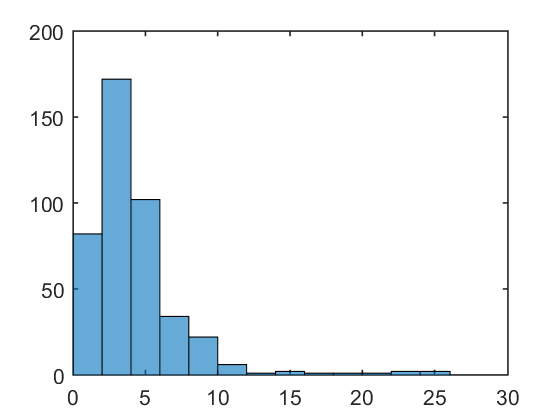

In [40]:
histogram(wage)

In [ ]:
histogram(wage)

### Question 4

#### Question 5

#### Question 6

## Partie 2. Séries temporelles